In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset

data = pd.read_csv("Data Assignment - Associate ABC.csv")
data.head()

,Date,No of Leads,Time Spent on LG (in mins)
0,9/1/2023,2.0,300.0
1,10/1/2023,1.0,300.0
2,11/1/2023,5.0,300.0
3,12/1/2023,4.0,300.0
4,13/1/2023,5.0,300.0


In [3]:
#checking for missing values

data.isnull().sum()

Date                           0
No of Leads                   34
Time Spent on LG (in mins)    24
dtype: int64

In [5]:
#Checking the summary of the dataset

data.describe()

,No of Leads,Time Spent on LG (in mins)
count,48.000000,58.000000
mean,6.541667,288.310345
std,4.135772,163.955194
min,0.000000,0.000000
25%,4.000000,300.000000
50%,6.000000,300.000000
75%,10.000000,360.000000
max,15.000000,540.000000


In [11]:
#Checking the shape of the dataset

data.shape

(82, 3)

In [12]:
#Checking for data types

data.dtypes

Date                           object
No of Leads                   float64
Time Spent on LG (in mins)    float64
dtype: object

In [13]:
#Converting date column to date and time format

data['Date'] = pd.to_datetime(data['Date'])

data.dtypes

C:\Users\Anju Reddy K\AppData\Local\Temp\ipykernel_9412\596426805.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


Date                          datetime64[ns]
No of Leads                          float64
Time Spent on LG (in mins)           float64
dtype: object

In [15]:
#Filling the missing values using mean imputation

data['No of Leads'].fillna(data['No of Leads'].mean(), inplace=True)
data['Time Spent on LG (in mins)'].fillna(data['Time Spent on LG (in mins)'].mean(), inplace=True)

In [18]:
data.isnull().sum()

Date                          0
No of Leads                   0
Time Spent on LG (in mins)    0
dtype: int64

In [20]:
#Checking the outliers

column_name = 'Time Spent on LG (in mins)'  

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect and mark outliers in a new column 'Is_Outlier'
data['Is_Outlier'] = (data[column_name] < lower_bound) | (data[column_name] > upper_bound)

# Check the DataFrame to see which rows are outliers
outliers = data[data['Is_Outlier']]

# Print the outliers
print(outliers)

         Date  No of Leads  Time Spent on LG (in mins)  Is_Outlier
31 2023-09-02     4.000000                       540.0        True
32 2023-10-02     3.000000                       540.0        True
35 2023-02-13    15.000000                       540.0        True
36 2023-02-14    12.000000                       540.0        True
37 2023-02-15     4.000000                       540.0        True
38 2023-02-16    10.000000                       540.0        True
39 2023-02-17    11.000000                       540.0        True
45 2023-02-23    14.000000                       390.0        True
46 2023-02-24     1.000000                        60.0        True
49 2023-02-27     9.000000                       360.0        True
50 2023-02-28    12.000000                       360.0        True
51 2023-01-03     3.000000                       360.0        True
52 2023-02-03    15.000000                       420.0        True
53 2023-03-03     0.000000                         0.0        

In [21]:
#Checking the outliers

column_name = 'No of Leads'  

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect and mark outliers in a new column 'Is_Outlier'
data['Is_Outlier'] = (data[column_name] < lower_bound) | (data[column_name] > upper_bound)

# Check the DataFrame to see which rows are outliers
outliers = data[data['Is_Outlier']]

# Print the outliers
print(outliers)

         Date  No of Leads  Time Spent on LG (in mins)  Is_Outlier
1  2023-10-01          1.0                       300.0        True
8  2023-01-17          0.0                       300.0        True
16 2023-01-25          1.0                       300.0        True
22 2023-01-31          0.0                       300.0        True
35 2023-02-13         15.0                       540.0        True
36 2023-02-14         12.0                       540.0        True
39 2023-02-17         11.0                       540.0        True
45 2023-02-23         14.0                       390.0        True
46 2023-02-24          1.0                        60.0        True
50 2023-02-28         12.0                       360.0        True
52 2023-02-03         15.0                       420.0        True
53 2023-03-03          0.0                         0.0        True
56 2023-06-03         15.0                       360.0        True


In [22]:
# Calculating the average Leads generated per day
average_leads_per_day = data.groupby('Date')['No of Leads'].mean()

print(average_leads_per_day)

Date
2023-01-02    6.770833
2023-01-03    3.000000
2023-01-13    5.000000
2023-01-14    6.541667
2023-01-15    6.541667
                ...   
2023-10-03    6.541667
2023-11-01    5.000000
2023-11-02    6.541667
2023-12-01    4.000000
2023-12-02    6.541667
Name: No of Leads, Length: 61, dtype: float64


In [23]:
#Calculating average time spent per day
average_time_spent_per_day = data.groupby('Date')['Time Spent on LG (in mins)'].mean()

print(average_time_spent_per_day)

Date
2023-01-02    157.500000
2023-01-03    360.000000
2023-01-13    300.000000
2023-01-14    288.310345
2023-01-15    288.310345
                 ...    
2023-10-03    288.310345
2023-11-01    300.000000
2023-11-02    288.310345
2023-12-01    300.000000
2023-12-02    288.310345
Name: Time Spent on LG (in mins), Length: 61, dtype: float64


In [24]:
#Calculating Conversion rate
data['Conversion Rate (Leads per Hour)'] = data['No of Leads'] / (data['Time Spent on LG (in mins)'] / 60)

print(data)

         Date  No of Leads  Time Spent on LG (in mins)  Is_Outlier  \
0  2023-09-01     2.000000                       300.0       False   
1  2023-10-01     1.000000                       300.0        True   
2  2023-11-01     5.000000                       300.0       False   
3  2023-12-01     4.000000                       300.0       False   
4  2023-01-13     5.000000                       300.0       False   
..        ...          ...                         ...         ...   
77 2023-06-02     6.541667                         4.0       False   
78 2023-07-02     6.541667                         2.0       False   
79 2023-08-02     6.541667                         0.0       False   
80 2023-09-02     6.541667                         0.0       False   
81 2023-10-02     6.541667                        14.0       False   

    Conversion Rate (Leads per Hour)  
0                           0.400000  
1                           0.200000  
2                           1.000000  
3  

In [26]:
print(data['Conversion Rate (Leads per Hour)'].head(20))

0     0.40000
1     0.20000
2     1.00000
3     0.80000
4     1.00000
5     1.36138
6     1.36138
7     1.00000
8     0.00000
9     2.00000
10    1.40000
11    1.20000
12    1.36138
13    1.36138
14    2.00000
15    1.40000
16    0.20000
17    1.00000
18    0.80000
19    1.36138
Name: Conversion Rate (Leads per Hour), dtype: float64


In [27]:
#Calculating total leads generated
total_leads_generated = data['No of Leads'].sum()

print("Total Leads Generated:", total_leads_generated)

Total Leads Generated: 536.4166666666666


In [37]:
#Calculating the average of conversion rate

# Filter out rows with very low or zero time spent
filtered_data = data[data['Time Spent on LG (in mins)'] > 0]

average_conversion_rate = filtered_data['Conversion Rate (Leads per Hour)'].mean()

print("Average Conversion Rate (Leads per Hour):", average_conversion_rate)

Average Conversion Rate (Leads per Hour): 8.230660879409365


In [38]:
#Calculating the average of total leads generated
average_total_leads_generated = data['No of Leads'].mean()

print("Average Total Leads Generated:", average_total_leads_generated)

Average Total Leads Generated: 6.541666666666666


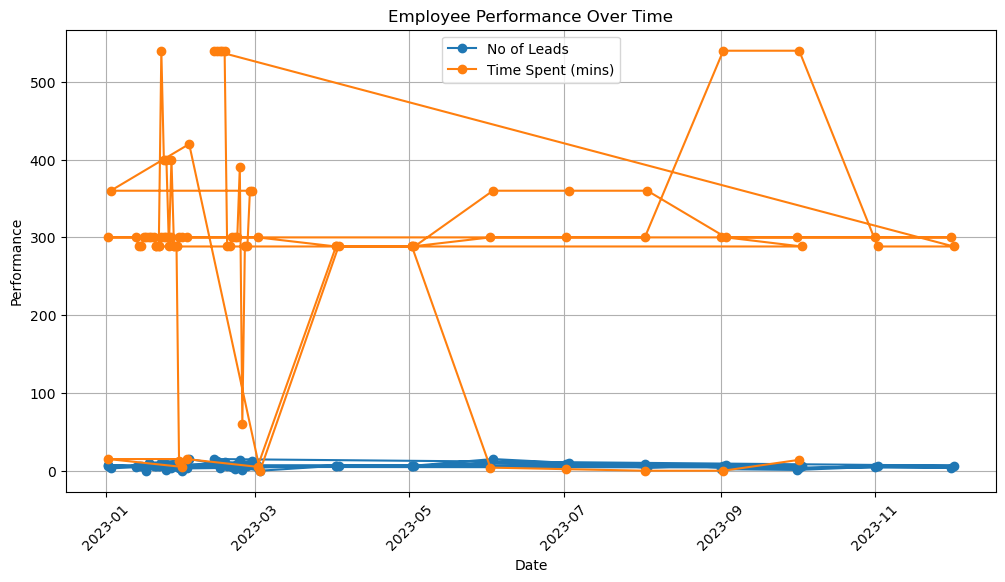

In [28]:
# Creating a line chart to show the trend of employee performance over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['No of Leads'], label='No of Leads', marker='o')
plt.plot(data['Date'], data['Time Spent on LG (in mins)'], label='Time Spent (mins)', marker='o')
plt.title('Employee Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Performance')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

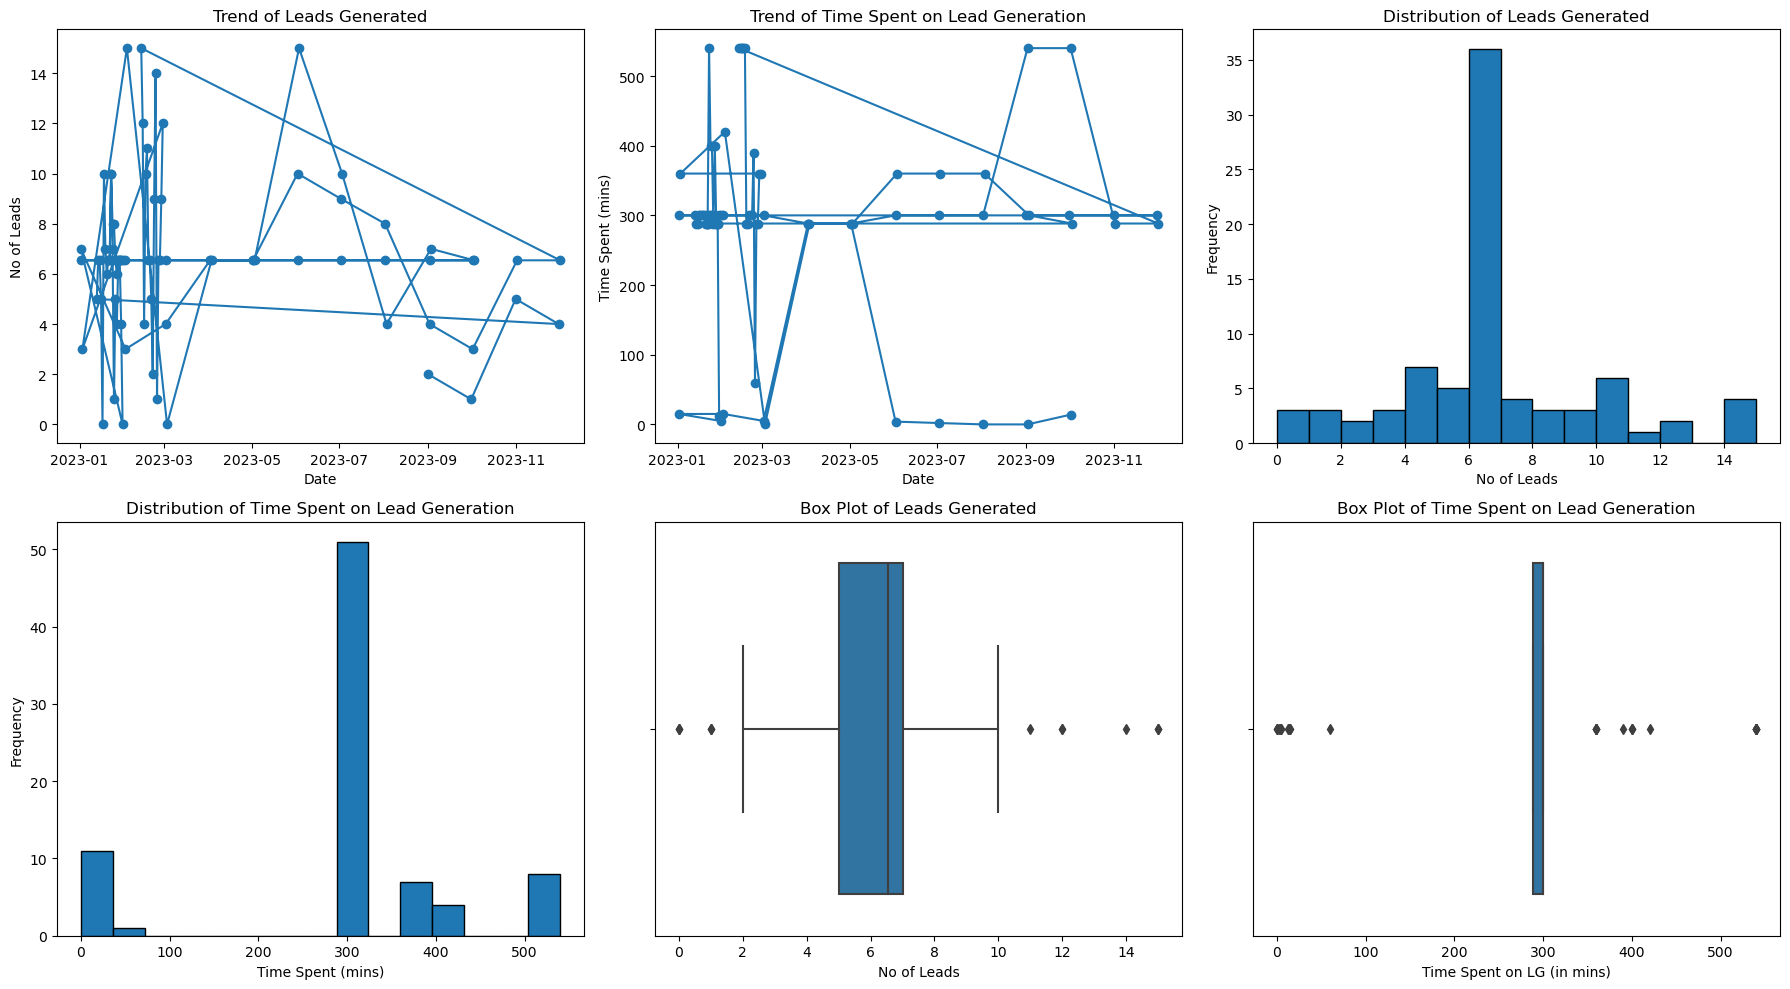

In [35]:
# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Line chart showing the trend of leads generated over time
axes[0, 0].plot(data['Date'], data['No of Leads'], marker='o')
axes[0, 0].set_title('Trend of Leads Generated')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('No of Leads')

# Line chart showing the trend of time spent on lead generation
axes[0, 1].plot(data['Date'], data['Time Spent on LG (in mins)'], marker='o')
axes[0, 1].set_title('Trend of Time Spent on Lead Generation')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Time Spent (mins)')

# Histogram of leads generated
axes[0, 2].hist(data['No of Leads'], bins=15, edgecolor='k')
axes[0, 2].set_title('Distribution of Leads Generated')
axes[0, 2].set_xlabel('No of Leads')
axes[0, 2].set_ylabel('Frequency')

# Histogram of time spent on lead generation
axes[1, 0].hist(data['Time Spent on LG (in mins)'], bins=15, edgecolor='k')
axes[1, 0].set_title('Distribution of Time Spent on Lead Generation')
axes[1, 0].set_xlabel('Time Spent (mins)')
axes[1, 0].set_ylabel('Frequency')

# Box plot of leads generated
sns.boxplot(x=data['No of Leads'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Leads Generated')

#Box plot of time spent on lead generation
sns.boxplot(x=data['Time Spent on LG (in mins)'], ax=axes[1, 2])
axes[1, 2].set_title('Box Plot of Time Spent on Lead Generation')

# To show the plots
plt.tight_layout()
plt.show()